# Amazon Product Graph Analysis: Project
## Background & Hints

### Problem: Predicting Personal Traits from Facebook Likes
#### A General Schema

* get facebook like data
    * $x$ derived from $L$ = likes
    * $y$ derived from $T$ = traits

* reduce dimensions of data  (`PCA`)
* build prediction models
    * linear regression
    * logistic regression
* evaluate accuracy
    * standard statistical measures
    * comparison with other methods (eg., iq tests, etc.)

## Simulating Data

When simulating data you start with random simulations of $y$ and generate correlating $X$s. To do this, you just use $y$ in generating $X$. 

## Simulating Like Data

$L \in \{0, 1\}^{N_{l}*N_{u}}$

In [10]:
import numpy as np

In [138]:
N_likes = 55_000 // 100
N_users = 10_000_000 // 100
D_like = [0, 1]

In [160]:
(100 / 55_000) 

0.0018181818181818182

In [141]:
N_likes * N_users

55000000

In [139]:
L = np.random.choice(D_like, size=(N_users, N_likes))
T_age = np.random.normal(30, 5, size=N_users) 
T_drugs = np.random.choice([0, 1], p=[0.85, 0.15], size=N_users) 

## Machine Learning Methodology

In [109]:
from sklearn.decomposition import PCA

L_pca = PCA(100).fit_transform(L)

In [108]:
from sklearn.linear_model import LinearRegression

In [123]:
X = L_pca
y = T_age

In [124]:
age_model = LinearRegression().fit(X, y)

In [125]:
age_model.score(X, y) * 100

0.0925904260963839

In [115]:
from sklearn.model_selection import cross_val_score

In [118]:
cross_val_score(LinearRegression(), X, y).mean() * 100

-0.13801025656344112

---

In [120]:
from sklearn.linear_model import LogisticRegression

In [130]:
X = L_pca
y = T_drugs

drug_model = LogisticRegression().fit(X, y)

In [128]:
drug_model.score(X, y)

0.85009

Why is this $85\%$? Note both `X` and `y` are independelty randomly generate...

In [133]:
1 - y.mean()

0.85009

It's just alwayas predicting `1`. 

```py

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y, drug_model.predict(X), pos_label=2)
auc(fpr, tpr)

```

---

In [ ]:
L

In [28]:
L.shape

(10000, 55)

In [43]:
T_age = np.random.normal(30, 5, N_users).astype(int)

In [44]:
T_age

array([28, 37, 13, ..., 38, 33, 27])

In [66]:
np.random.choice([0, 1], size=N_users)

array([0, 1, 0, ..., 0, 1, 1])

In [100]:
y_age_vector =  (
    
    (T_age >= 45) * np.random.choice([0, 1], size=N_users)
              
).astype(int).reshape(-1, 1)

In [101]:
X5 = L[:, :5] * y_age_vector

In [93]:
from sklearn.decomposition import PCA

In [94]:
x5_pca = PCA(1).fit_transform(X5)

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
LinearRegression().fit(x5_pca, T_age).coef_

array([11.11163829])

In [97]:
%matplotlib inline
import seaborn as sns

<AxesSubplot:>

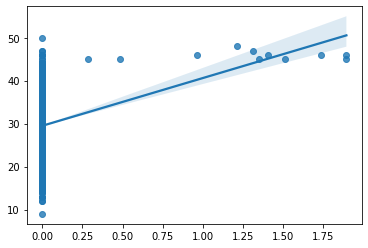

In [98]:
sns.regplot(x=x5_pca, y=T_age)

---

In [145]:
class SparseMatrix:
    def __init__(self):
        self.indexs_of_one = [
            (0, 1), (300, 300), (12, 78)
        ]
        
    def __getitem__(self, index):
        if index in self.indexs_of_one:
            return 1
        else:
            return 0

In [150]:
M = SparseMatrix()
M[0, 1]

1

In [151]:
M[300, 300]

1

In [152]:
M[0, 34343]

0